<a href="https://colab.research.google.com/github/ABILASH9999/NM_project/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

df = pd.read_csv('/content/real_2016.csv')

print(df)


        T    TM    Tm     SLP   H   VV     V    VM      PM 2.5
0    16.9  25.1   6.6  1021.3  65  1.1   2.0   7.6  284.795833
1    15.5  24.1   7.7  1021.0  71  1.1   3.5  11.1  219.720833
2    14.9  22.8   8.0  1018.4  73  1.1   5.9  13.0  182.187500
3    18.3  24.7  11.5  1018.1  85  0.5   1.1   7.6  154.037500
4    16.5  24.7  12.0  1017.4  82  0.6   8.0  13.0  223.208333
5    16.6  22.2  10.2  1015.4  65  1.8  10.0  20.6  200.645833
6    18.2  25.1  12.0  1014.4  77  0.6   5.0  11.1  285.225000
7    15.6  23.2  10.9  1015.6  82  0.6   4.3   9.4  236.825000
8    13.0  19.0   9.6  1016.9  85  0.8  10.7  16.5  276.908333
9    12.3  19.0   8.9  1015.8  91  0.5   4.6   9.4  108.000000
10   11.9  15.7   7.5  1018.9  86  0.8   6.1  11.1  107.625000
11   12.0  17.0   6.7  1019.8  75  1.3   7.6  13.0  125.891667
12   11.7  18.0   6.4  1017.3  76  0.8   4.4  13.0  181.012500
13   14.6  21.0   6.8  1015.6  81  0.6   2.4   7.6  152.554167
14   17.7  24.0   9.0  1014.5  69  1.4   4.4   9.4  152

In [ ]:
df.isnull().sum()

,0
T,0
TM,0
Tm,0
SLP,0
H,0
VV,0
V,0
VM,0
PM 2.5,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is already loaded

# Remove duplicates
df.drop_duplicates(inplace=True)

# Define the feature columns (excluding the target column 'PM 2.5')
X = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]

# Standardization (Z-Score Normalization)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert the standardized data back to a DataFrame
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)

# Change pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Print the entire standardized dataset
print("Standardized Data:\n", df_standardized)

# If you want to reset the display options after printing:
pd.reset_option('display.max_rows')


Standardized Data:
             T        TM        Tm       SLP         H        VV         V        VM
0   -1.421877 -1.255137 -1.790515  1.804919  0.284909 -1.387882 -1.402942 -1.285980
1   -1.620490 -1.414260 -1.641723  1.764662  0.661780 -1.387882 -0.981733 -0.751701
2   -1.705610 -1.621119 -1.601143  1.415763  0.787404 -1.387882 -0.307800 -0.461664
3   -1.223264 -1.318786 -1.127713  1.375505  1.541146 -2.126364 -1.655667 -1.285980
4   -1.478623 -1.318786 -1.060080  1.281571  1.352711 -2.003284  0.281891 -0.461664
5   -1.464437 -1.716593 -1.303559  1.013187  0.284909 -0.526321  0.843503  0.698484
6   -1.237451 -1.255137 -1.060080  0.878995  1.038651 -2.003284 -0.560525 -0.751701
7   -1.606303 -1.557470 -1.208873  1.040025  1.352711 -2.003284 -0.757089 -1.011208
8   -1.975156 -2.225786 -1.384718  1.214475  1.541146 -1.757123  1.040066  0.072615
9   -2.074462 -2.225786 -1.479404  1.066863  1.918018 -2.126364 -0.672847 -1.011208
10  -2.131208 -2.750892 -1.668776  1.482859  1.603958 -1

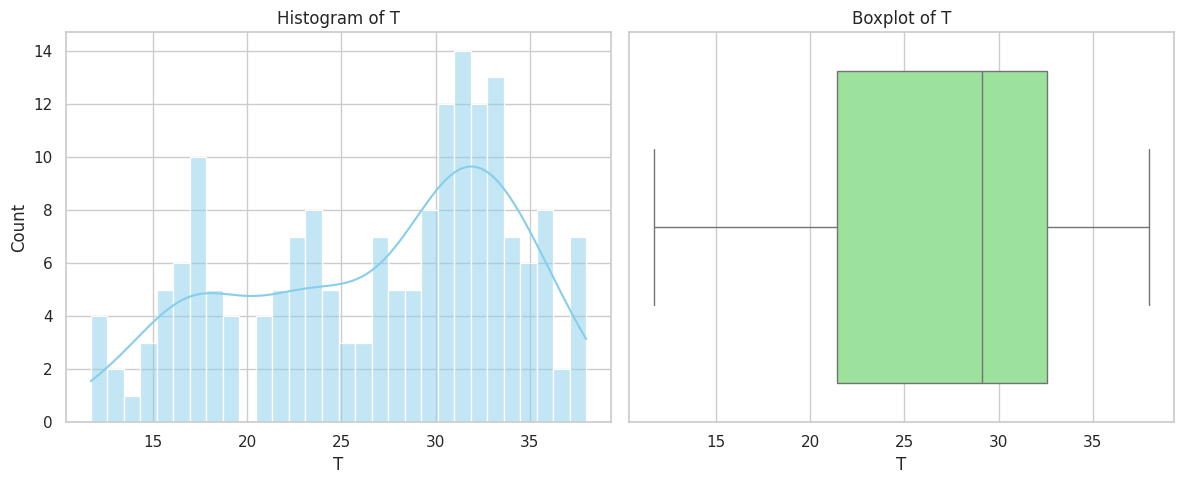

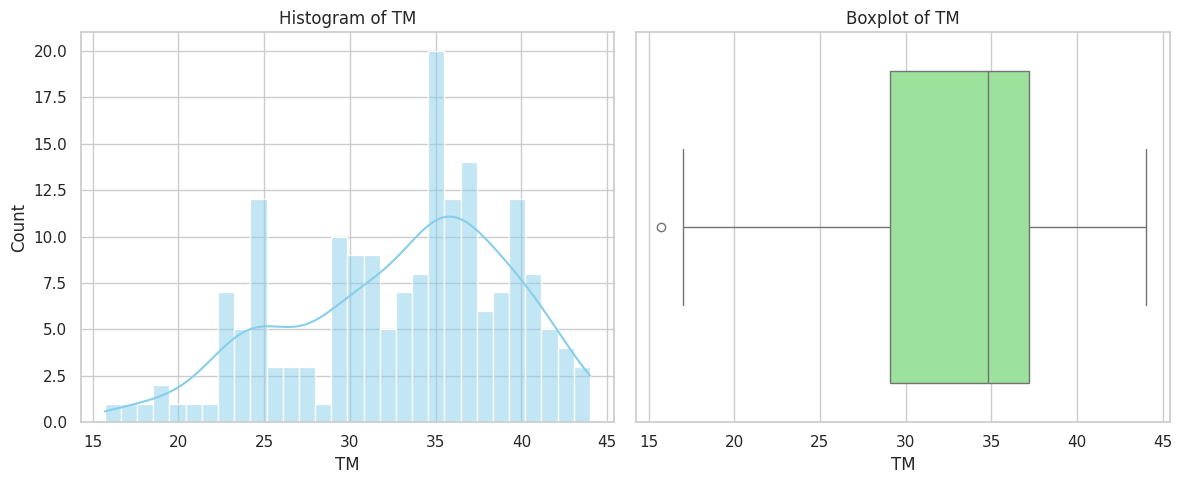

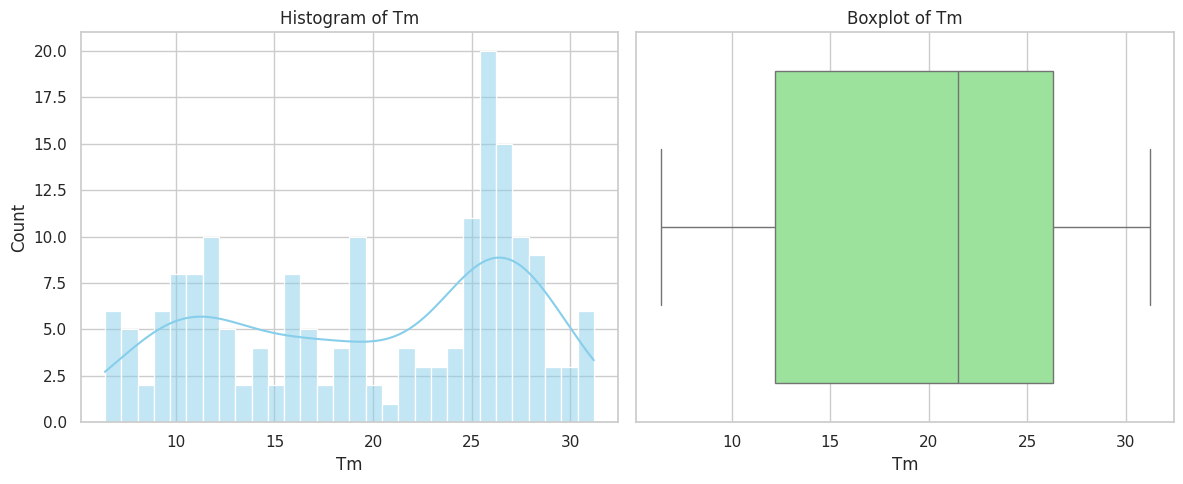

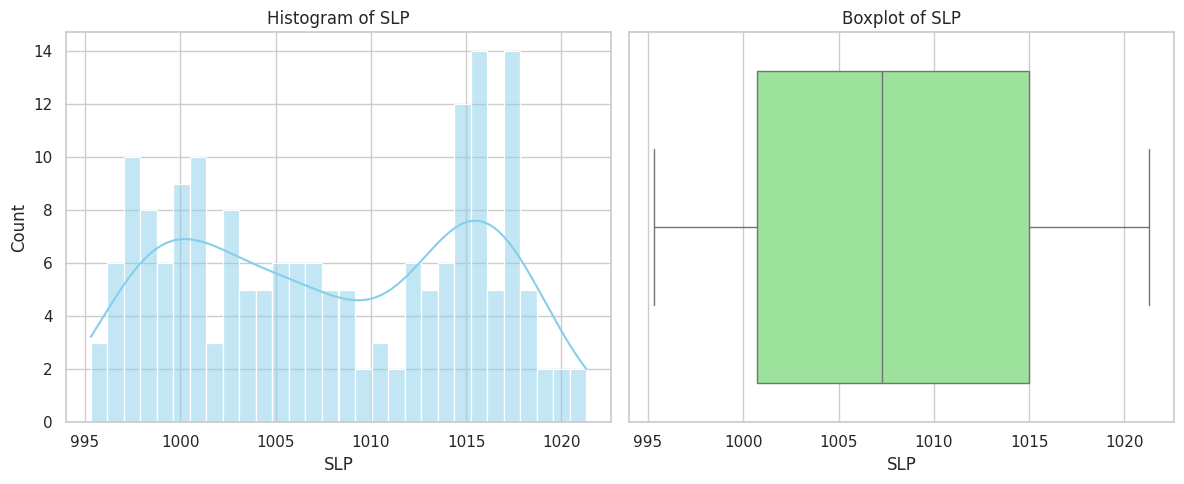

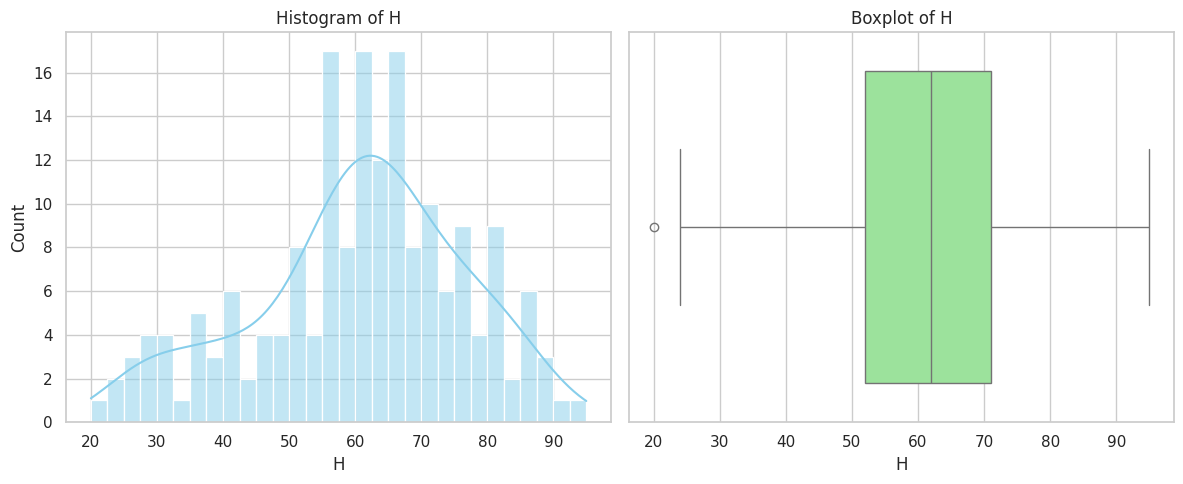

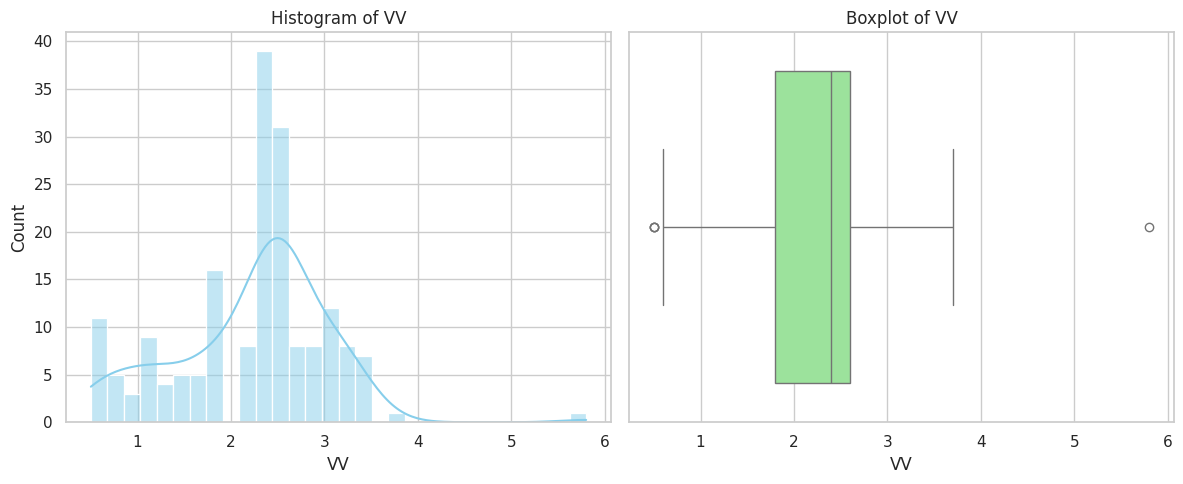

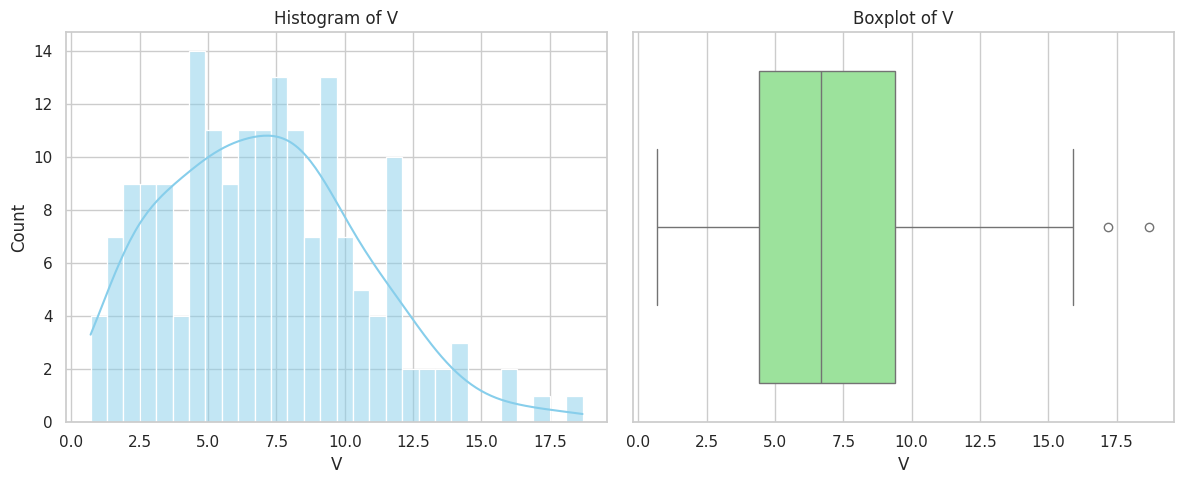

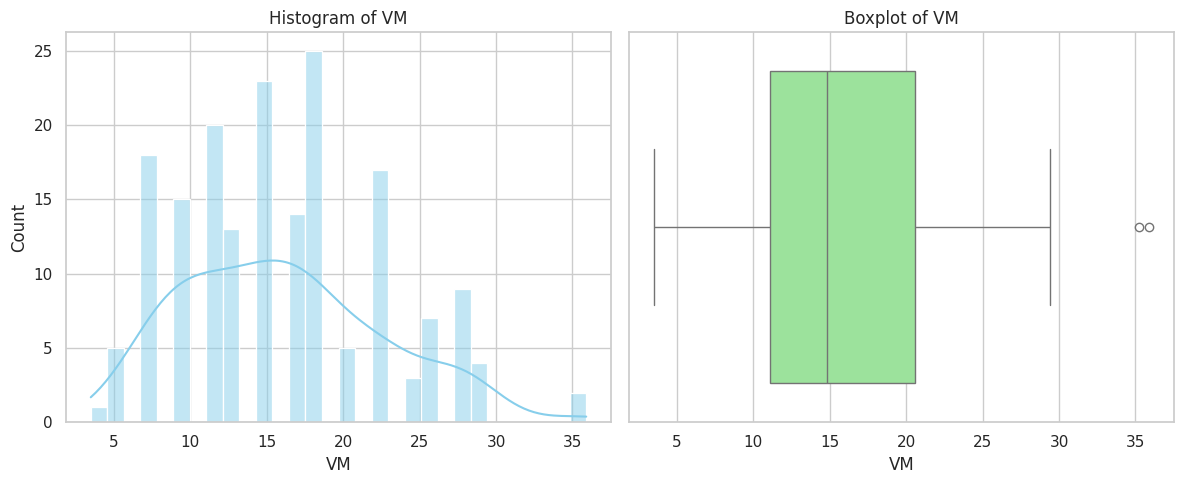

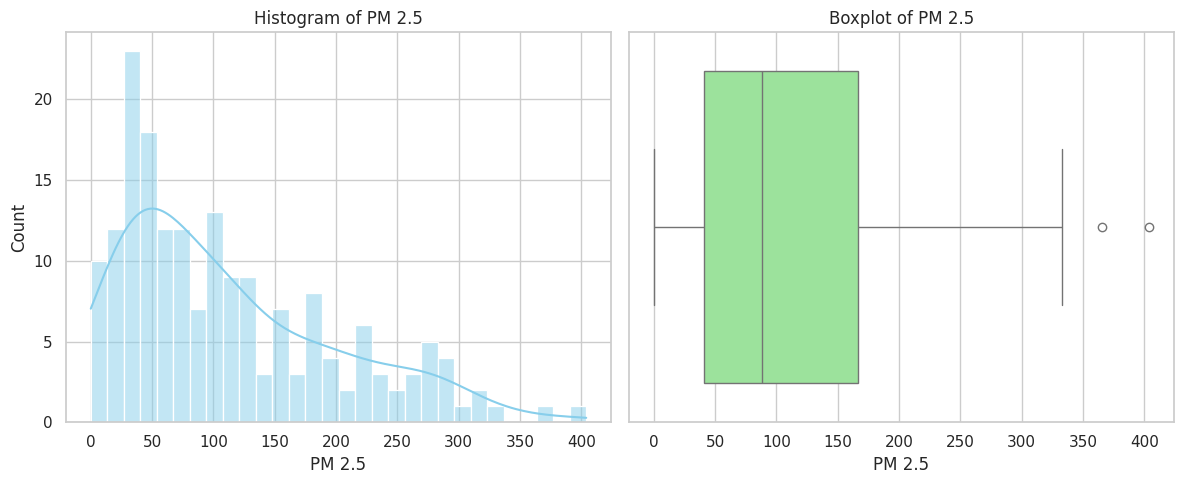

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to analyze
columns = ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5']

# Set plot style
sns.set(style="whitegrid")

# Plot histograms and boxplots
for col in columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


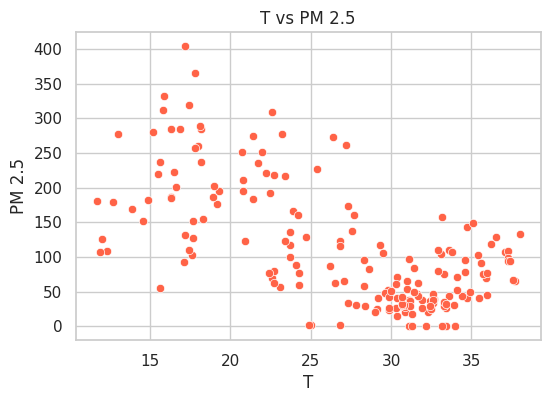

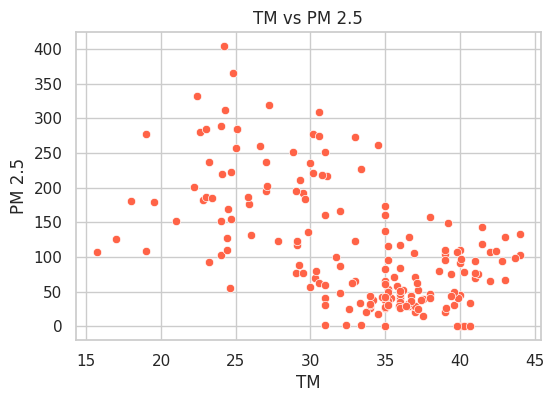

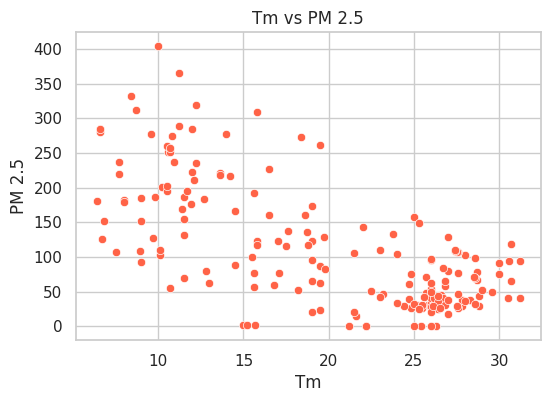

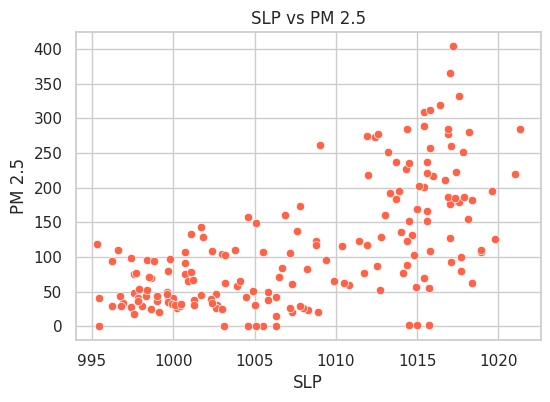

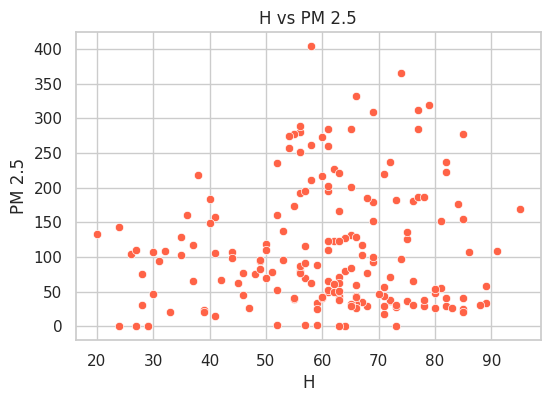

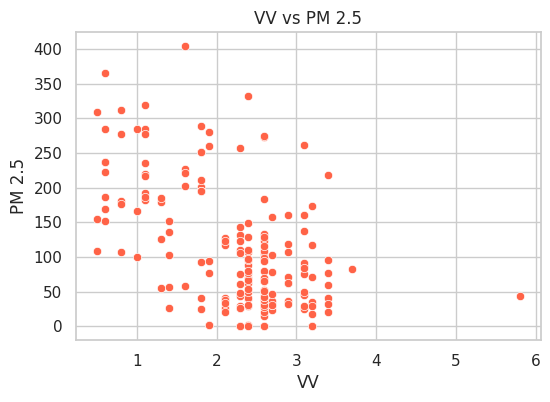

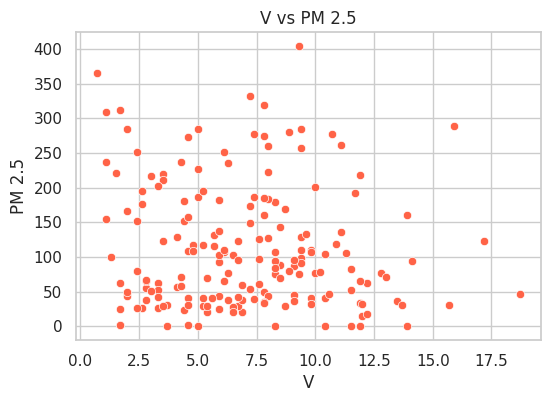

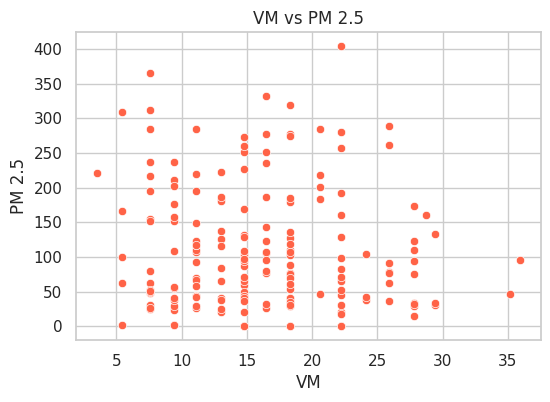

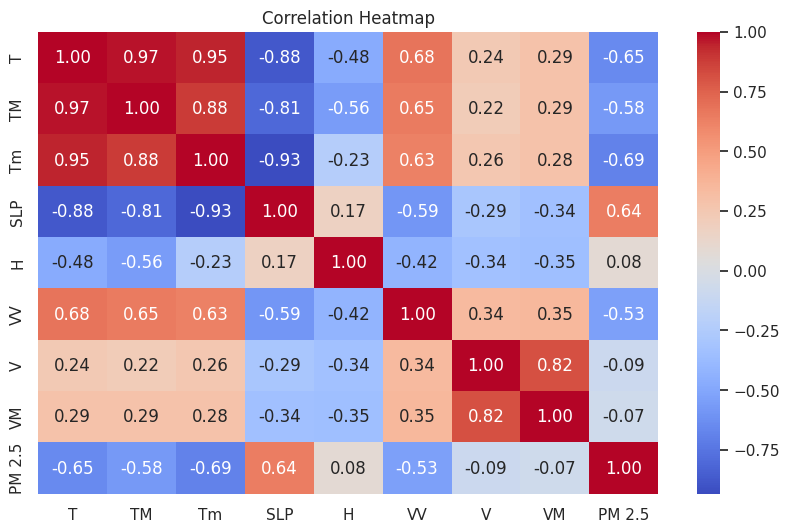

In [ ]:
# Scatter plots: each feature vs PM 2.5
for col in columns[:-1]:  # exclude 'PM 2.5' itself
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['PM 2.5'], color='tomato')
    plt.title(f'{col} vs PM 2.5')
    plt.xlabel(col)
    plt.ylabel('PM 2.5')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# 1. Create Humidity-to-Temperature Ratio (helps understand humidity effect on temperature)
df['H_T_ratio'] = df['H'] / (df['T'] + 1e-5)  # Avoid divide by zero by adding a small value

# 2. Create Wind Speed Impact Feature: Interaction between Visibility (VV) and Mean Wind Speed (VM)
df['VV_VM_interaction'] = df['VV'] * df['VM']

# 3. Pressure-Temperature Interaction Feature: Combining Sea-Level Pressure (SLP) and Temperature (T)
df['SLP_T_interaction'] = df['SLP'] * df['T']

# 4. Create the Temperature Difference Feature (Difference between Maximum and Minimum Temperature)
df['T_diff'] = df['T'] - df['Tm']

# 5. Create a feature for the ratio of Humidity to Wind Speed, which might highlight specific atmospheric conditions
df['H_VV_ratio'] = df['H'] / (df['VV'] + 1e-5)  # Avoid divide by zero

# 6. Ratio of Sea-Level Pressure to Visibility, which could give insight into air pressure and visibility relationships
df['SLP_VV_ratio'] = df['SLP'] / (df['VV'] + 1e-5)

# 7. Create a "Mean Wind Speed to Visibility" ratio
df['VM_VV_ratio'] = df['VM'] / (df['VV'] + 1e-5)

# To display all rows in the DataFrame
pd.set_option('display.max_rows', None)  # No limit to the number of rows displayed

# Now, print the entire DataFrame
print(df)




        T    TM    Tm     SLP   H   VV     V    VM      PM 2.5  H_T_ratio  VV_VM_interaction  SLP_T_interaction  T_diff  H_VV_ratio  SLP_VV_ratio  VM_VV_ratio
0    16.9  25.1   6.6  1021.3  65  1.1   2.0   7.6  284.795833   3.846152               8.36           17259.97    10.3   59.090372    928.446105     6.909028
1    15.5  24.1   7.7  1021.0  71  1.1   3.5  11.1  219.720833   4.580642              12.21           15825.50     7.8   64.544868    928.173380    10.090817
2    14.9  22.8   8.0  1018.4  73  1.1   5.9  13.0  182.187500   4.899326              14.30           15174.16     6.9   66.363033    925.809765    11.818074
3    18.3  24.7  11.5  1018.1  85  0.5   1.1   7.6  154.037500   4.644806               3.80           18631.23     6.8  169.996600   2036.159277    15.199696
4    16.5  24.7  12.0  1017.4  82  0.6   8.0  13.0  223.208333   4.969694               7.80           16787.10     4.5  136.664389   1695.638406    21.666306
5    16.6  22.2  10.2  1015.4  65  1.8  10.0  

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select all columns for standardization, excluding the target (e.g., PM 2.5)
# If 'PM 2.5' is your target column, you should exclude it from the scaling
features = df.drop(columns=['PM 2.5'])  # Update 'PM 2.5' with your target column name if necessary

# Fit and transform the selected features
df[features.columns] = scaler.fit_transform(features)

# To display all rows in the DataFrame
pd.set_option('display.max_rows', None)  # No limit to the number of rows displayed

# Now, print the entire DataFrame with standardized values
print(df)


            T        TM        Tm       SLP         H        VV         V        VM      PM 2.5  H_T_ratio  VV_VM_interaction  SLP_T_interaction    T_diff  H_VV_ratio  SLP_VV_ratio  VM_VV_ratio
0   -1.421877 -1.255137 -1.790515  1.804919  0.284909 -1.387882 -1.402942 -1.285980  284.795833   0.978504          -1.283172          -1.415154  1.350754    0.682373      0.951429    -0.296308
1   -1.620490 -1.414260 -1.641723  1.764662  0.661780 -1.387882 -0.981733 -0.751701  219.720833   1.532300          -1.114134          -1.621712  0.300193    0.849371      0.950705     0.450034
2   -1.705610 -1.621119 -1.601143  1.415763  0.787404 -1.387882 -0.307800 -0.461664  182.187500   1.772582          -1.022371          -1.715502 -0.078008    0.905037      0.944432     0.855192
3   -1.223264 -1.318786 -1.127713  1.375505  1.541146 -2.126364 -1.655667 -1.285980  154.037500   1.580678          -1.483383          -1.217699 -0.120031    4.077939      3.891508     1.648409
4   -1.478623 -1.318786 -1.060

In [ ]:
from sklearn.model_selection import train_test_split

# Assume 'PM 2.5' is your target variable
X = df.drop(columns=['PM 2.5'])  # Features
y = df['PM 2.5']  # Target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (144, 15)
Testing data shape: (37, 15)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model (Linear Regression)
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 51.548493896080124
Mean Squared Error (MSE): 4596.121337762551
R-squared (R2): 0.4178457411508021


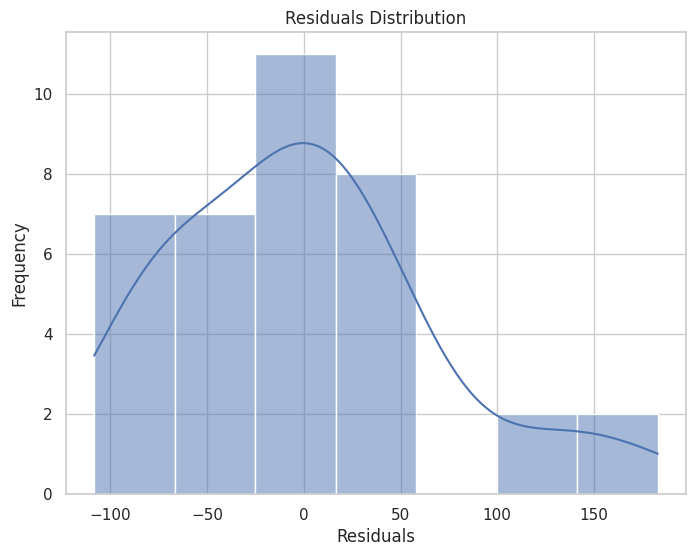

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


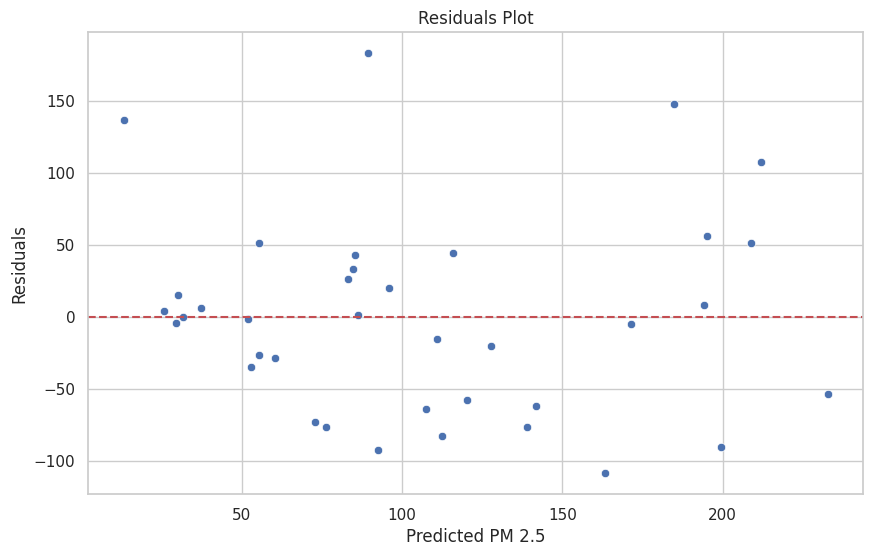

Mean Absolute Error (MAE): 51.548493896080124
Mean Squared Error (MSE): 4596.121337762551
R-squared (R2): 0.4178457411508021


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting the PM 2.5 values using the trained model
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted PM 2.5')
plt.ylabel('Residuals')
plt.show()

# Print MAE, MSE, R2
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'R-squared (R2): {r2_score(y_test, y_pred)}')


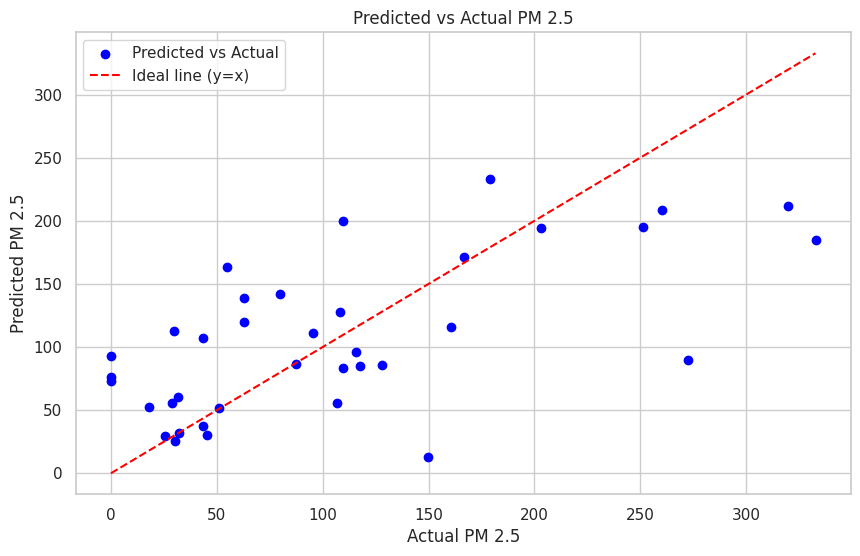

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the results
y_pred = model.predict(X_test)

# Plotting actual vs predicted values for visual comparison
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal line (y=x)')
plt.title('Predicted vs Actual PM 2.5')
plt.xlabel('Actual PM 2.5')
plt.ylabel('Predicted PM 2.5')
plt.legend()
plt.show()


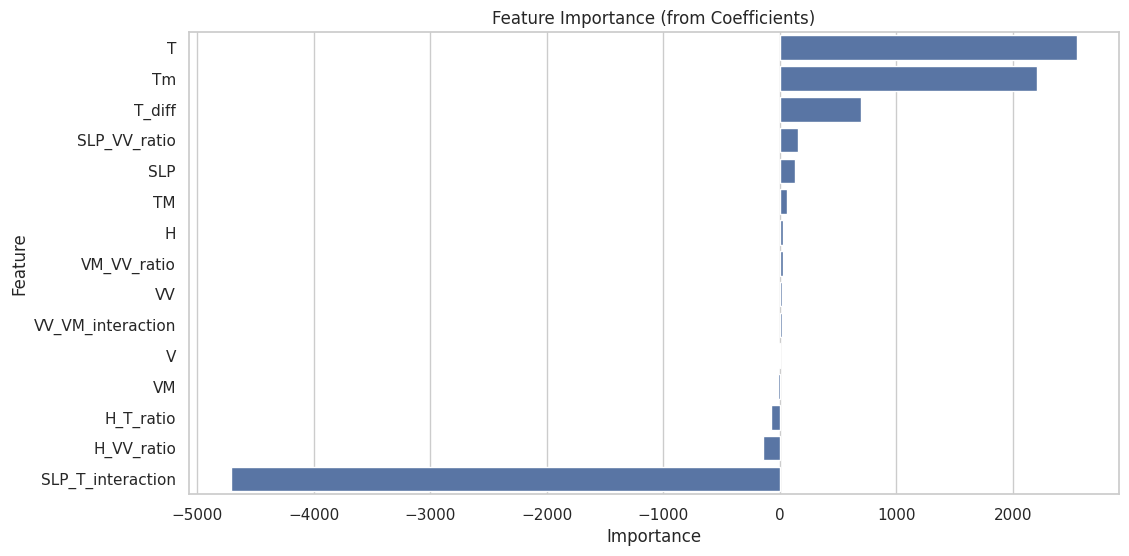

In [ ]:
# Coefficients from linear regression model
coefficients = model.coef_

# Create a DataFrame for feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (from Coefficients)')
plt.show()


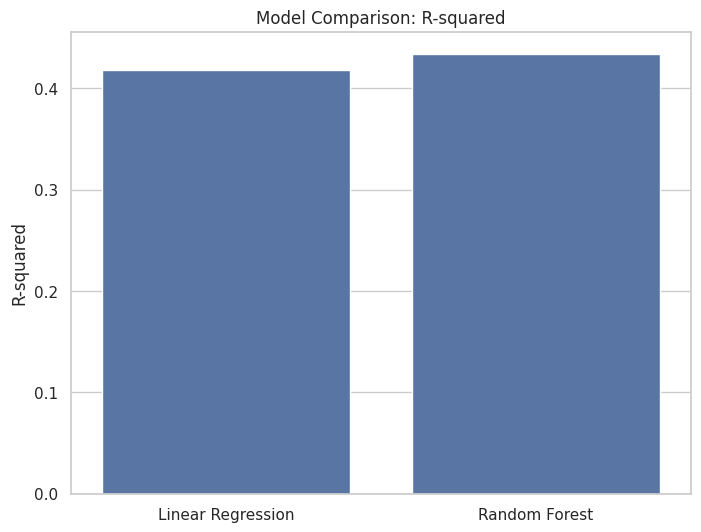

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 1. Linear Regression Predictions
y_pred_lr = model.predict(X_test)  # Assuming 'model' is your trained Linear Regression model

# 2. Train a Random Forest Model and Make Predictions
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Example random forest model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Compare R-squared of both models
models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]

# Plot the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=r2_scores)
plt.title('Model Comparison: R-squared')
plt.ylabel('R-squared')
plt.show()
